#IMPORTING ALL THE LIBRARIES

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

In [26]:
df=pd.read_csv('Student_Performance.csv')

In [27]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [28]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [29]:
df['Extra']=df['Extracurricular Activities'].map({'Yes':1,'No':0})

In [30]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [31]:
df.drop(columns=['Extracurricular Activities'], inplace=True)

In [32]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index', 'Extra'],
      dtype='object')

In [33]:
df.shape

(10000, 6)

In [34]:
df.head(5)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


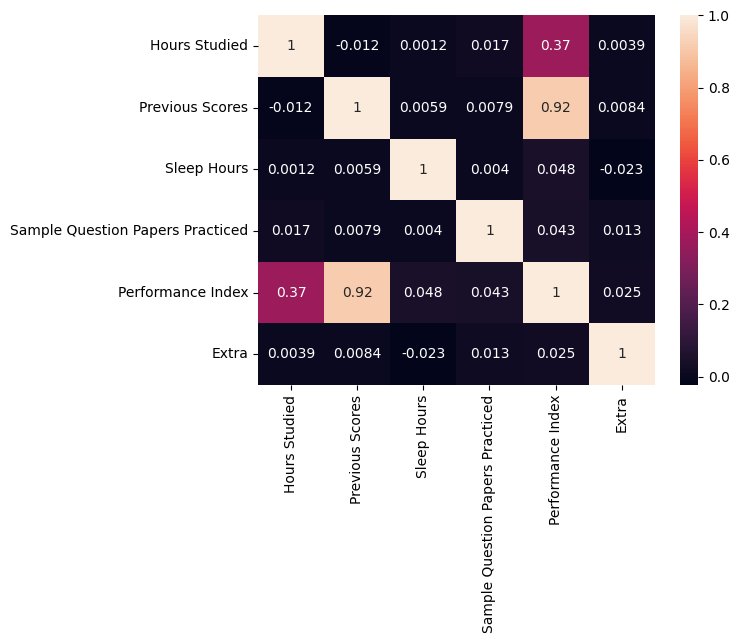

In [35]:
a=df.corr()
sns.heatmap(a,annot=True)  
plt.show() 

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
scale=StandardScaler

In [39]:

X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extra']]
y = df['Performance Index']

In [40]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extra
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
...,...,...,...,...,...
9995,1,49,4,2,1
9996,7,64,8,5,1
9997,6,83,8,5,1
9998,9,97,7,0,1


In [41]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index', 'Extra'],
      dtype='object')

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
# Example using StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()  # Instantiate the scaler
x_train_scaled = scale.fit_transform(x_train)

In [44]:
x_test_scaled = scale.transform(x_test)  

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model_linear = LinearRegression()
model_linear.fit(x_train_scaled, y_train)


LinearRegression()

In [47]:
y_pred = model_linear.predict(x_test_scaled)

In [48]:
y_pred

array([54.73187888, 22.61211054, 47.90838844, ..., 68.07396952,
       53.68636805, 54.85816372])

In [50]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R2 Score: 0.99
Mean Squared Error: 4.03


In [52]:
from sklearn.linear_model import ElasticNet

In [54]:
model=ElasticNet(alpha=0.1, l1_ratio=0.5)

In [55]:
model.fit(x_train_scaled, y_train)

ElasticNet(alpha=0.1)

In [56]:
y_elast=model.predict(x_test_scaled)

In [57]:
y_elast

array([54.80524788, 24.27865794, 48.20583582, ..., 67.40020359,
       53.88232404, 54.90036497])

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_elast)
mse = mean_squared_error(y_test, y_elast)

In [60]:
r2

0.9857783677438854

In [61]:
mse

5.239813409974442

In [62]:
np.sqrt(mse)

2.2890638719735286

In [63]:
import pickle

In [64]:
with open('finalmodel.pkl', 'wb') as f:
    pickle.dump(model, f)

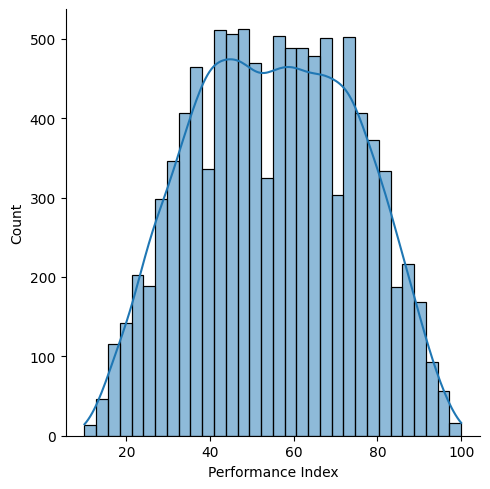

In [67]:
sns.displot(df['Performance Index'],kde=True)
plt.show()

In [69]:
scale

StandardScaler()

In [70]:
pickle.dump(scale, open('scaler.pkl','wb'))